In [ ]:
import tensorflow as tf

print(tf.__version__)

2.9.3


#LOAD DATA

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try :
  from google.colab import drive
  drive.mount('/content/drive')
  in_colab = True
except:
  print("not in colab")
  in_colab = False


not in colab


In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("Available GPUs:")
    for gpu in gpus:
        print(gpu.name)
else:
    print("No GPUs available.")

Available GPUs:
/physical_device:GPU:0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishmotwani/tomato")

print("Path to dataset files:", path)

C:\Users\Kamal\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Kamal\.cache\kagglehub\datasets\ashishmotwani\tomato\versions\1


In [ ]:
!ls /root/.cache/kagglehub/datasets/ashishmotwani/tomato/versions/1


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
train_path = os.path.join(path,"train")
valid_path = os.path.join(path, "valid")

In [ ]:
def create_df(file_path):
  data = []
  for folder in os.listdir(file_path):
    for image in os.listdir(os.path.join(file_path,folder)):
      absolute_path = os.path.abspath(os.path.join(file_path, folder, image))
      data.append([absolute_path, folder])
  return pd.DataFrame(data, columns=['path', 'classes'])

In [ ]:
train_df = create_df(train_path)
print("train: \n")
train_df

train: 



path  \
0      C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
1      C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
2      C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
3      C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
4      C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
...                                                  ...   
25846  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
25847  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
25848  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
25849  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
25850  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   

                             classes  
0                     Bacterial_spot  
1                     Bacterial_spot  
2                     Bacterial_spot  
3                     Bacterial_spot  
4                     Bacterial_spot  
...                              ...  
25846  Tomato_Yellow_Leaf_Curl_Virus  
25847  Tomato_Yellow_Leaf_Curl_Virus  
25848  Tomato_Yellow_Leaf_Curl_Virus  
25849  Tomato_Yellow_Leaf_Curl_Virus  
25850  Tomato_Yellow_Leaf_Curl_Virus  

[25851 rows x 2 columns]

In [ ]:
valid_df = create_df(valid_path)
print("valid: \n"),
valid_df

valid: 



path  \
0     C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
1     C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
2     C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
3     C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
4     C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
...                                                 ...   
6678  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
6679  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
6680  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
6681  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
6682  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   

                            classes  
0                    Bacterial_spot  
1                    Bacterial_spot  
2                    Bacterial_spot  
3                    Bacterial_spot  
4                    Bacterial_spot  
...                             ...  
6678  Tomato_Yellow_Leaf_Curl_Virus  
6679  Tomato_Yellow_Leaf_Curl_Virus  
6680  Tomato_Yellow_Leaf_Curl_Virus  
6681  Tomato_Yellow_Leaf_Curl_Virus  
6682  Tomato_Yellow_Leaf_Curl_Virus  

[6683 rows x 2 columns]

In [ ]:
import cv2

In [ ]:
#print top 5 path of all the classes
print(train_df['classes'].unique())

train_df['path'][train_df['classes']=='healthy']

['Bacterial_spot' 'Early_blight' 'healthy' 'Late_blight' 'Leaf_Mold'
 'powdery_mildew' 'Septoria_leaf_spot'
 'Spider_mites Two-spotted_spider_mite' 'Target_Spot'
 'Tomato_mosaic_virus' 'Tomato_Yellow_Leaf_Curl_Virus']


5281    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
5282    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
5283    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
5284    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
5285    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
                              ...                        
8327    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
8328    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
8329    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
8330    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
8331    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...
Name: path, Length: 3051, dtype: object

In [ ]:
train_df['classes'].value_counts()

Late_blight                             3113
healthy                                 3051
Septoria_leaf_spot                      2882
Bacterial_spot                          2826
Leaf_Mold                               2754
Early_blight                            2455
Tomato_mosaic_virus                     2153
Tomato_Yellow_Leaf_Curl_Virus           2039
Target_Spot                             1827
Spider_mites Two-spotted_spider_mite    1747
powdery_mildew                          1004
Name: classes, dtype: int64

In [ ]:
def display_image(df,df_class):
  plt.subplot(5,5,1)
  for i in range(5):
    plt.subplot(5,5,i+1)
    plt.title(df_class,fontsize =6)
    path =train_df['path'][train_df['classes']==df_class].tolist()[i]
    image= cv2.imread(path)
    plt.imshow(image)
  plt.subplots_adjust(hspace= 30, wspace=30)
  plt.tight_layout()
  plt.show()

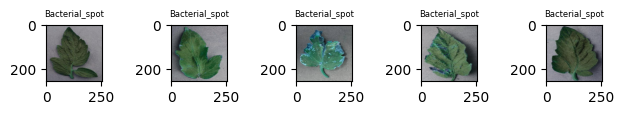

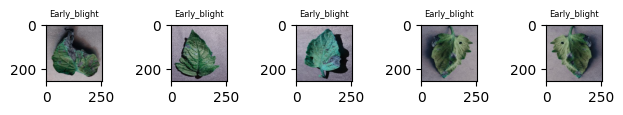

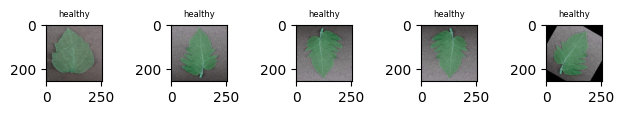

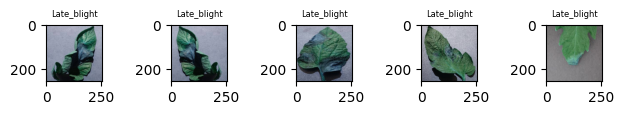

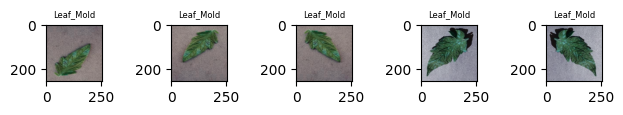

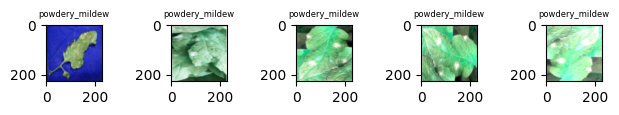

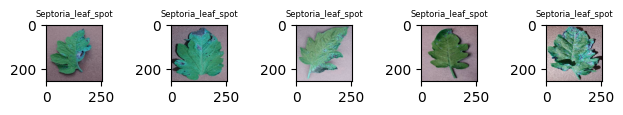

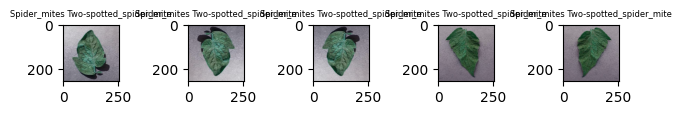

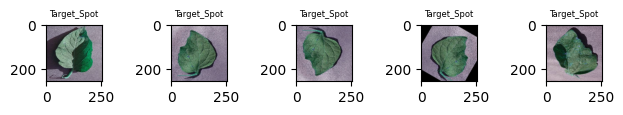

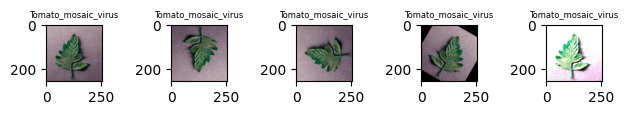

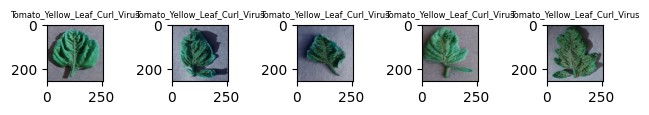

In [ ]:
for i in train_df['classes'].unique():
  display_image(train_df,i)

# Data Visulization


In [ ]:
def display_dencity(df):
  data_density = df['classes'].value_counts()
  fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
  data_density.plot(kind='bar', title='Data Dencity',ax=ax1)
  ax2.pie(data_density, labels=data_density.index, autopct='%1.1f%%')
  ax2.set_title('Train Data Density')
  plt.show()

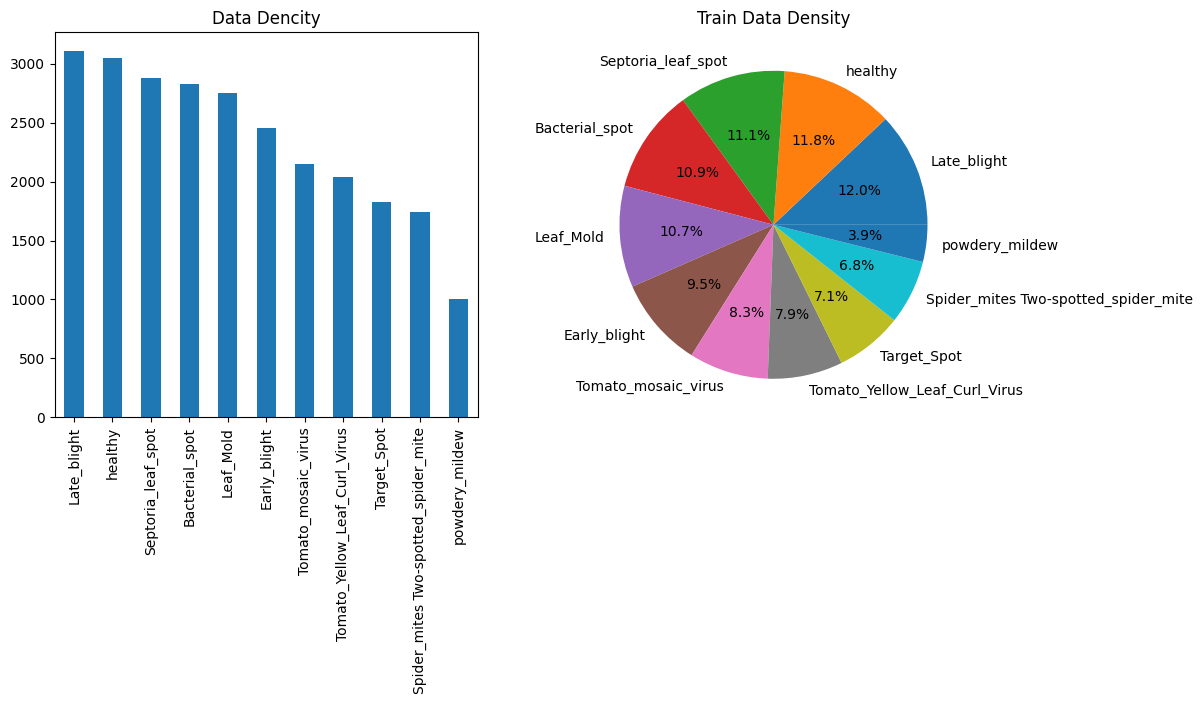

In [ ]:
display_dencity(train_df)

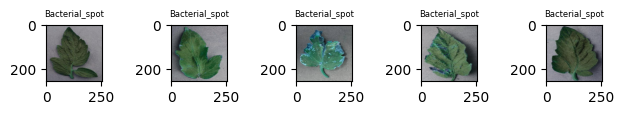

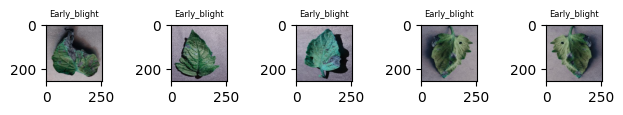

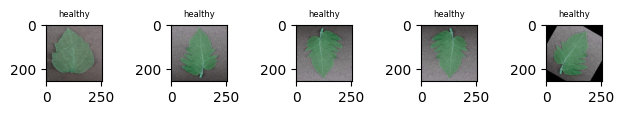

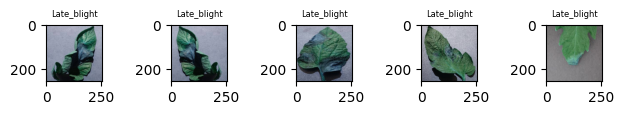

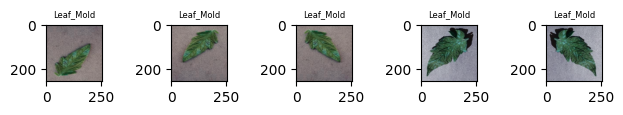

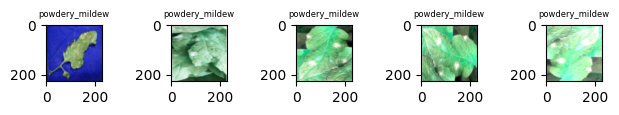

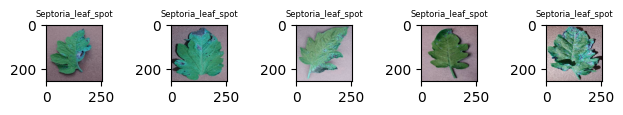

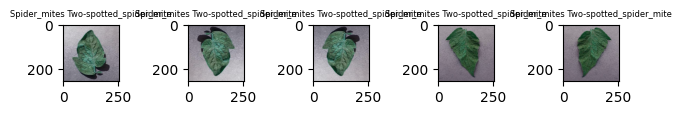

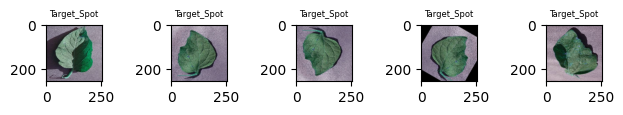

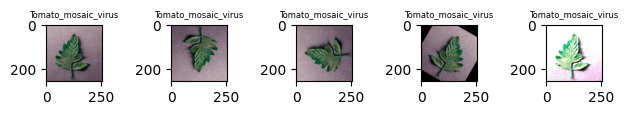

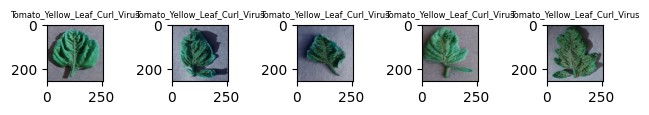

In [ ]:
for i in valid_df['classes'].unique():
  display_image(valid_df,i)

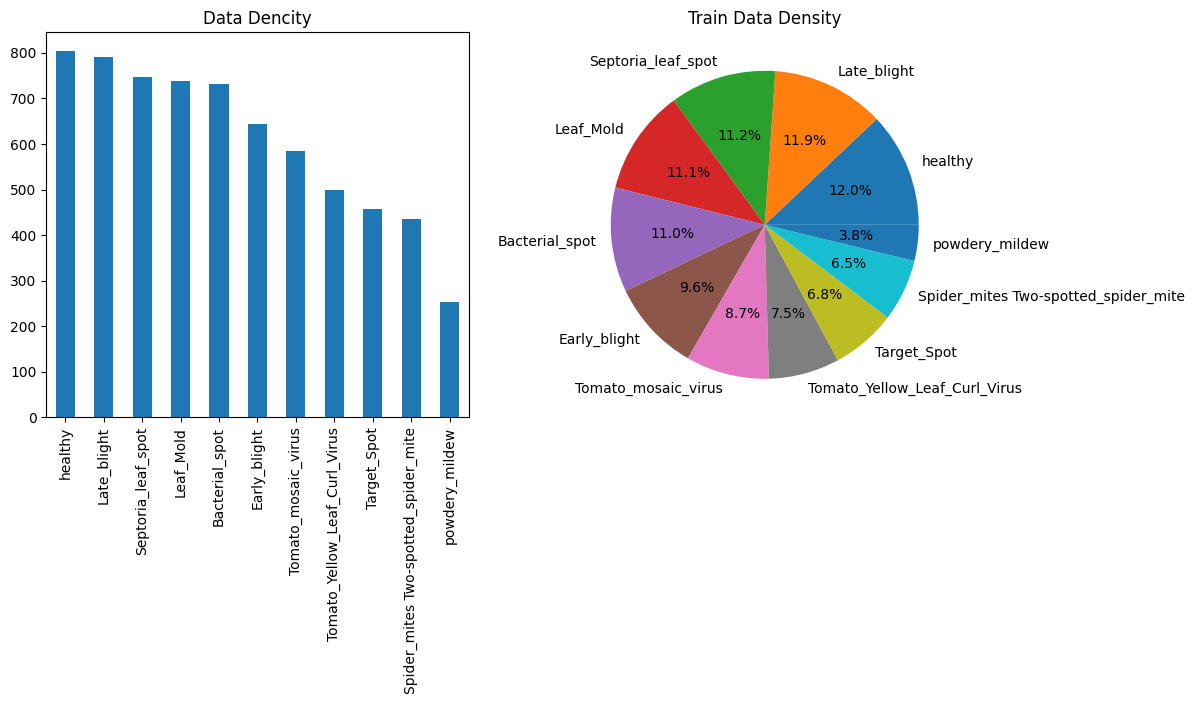

In [ ]:
display_dencity(valid_df)

Image Sape :  (256, 256, 3)


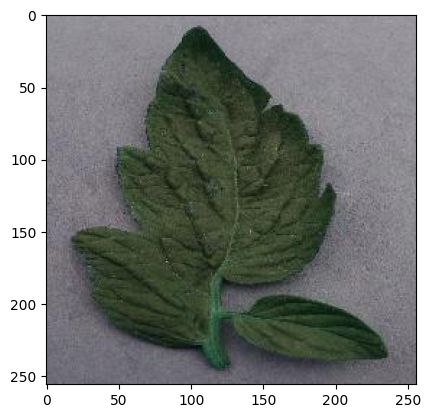

In [ ]:
image = cv2.imread(train_df['path'][0])
plt.imshow(image)
print("Image Sape : ",image.shape)

In [ ]:
image.shape

(256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X = train_df['path']
y = train_df['classes']

X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
train = pd.DataFrame({'path':X_train,'classes':y_train})
test = pd.DataFrame({'path':X_test,'classes':y_test})

In [ ]:
train

path  \
9470   C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
276    C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
10137  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
25554  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
18906  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
...                                                  ...   
15377  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
21602  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
17730  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
15725  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   
19966  C:\Users\Kamal\.cache\kagglehub\datasets\ashis...   

                                    classes  
9470                            Late_blight  
276                          Bacterial_spot  
10137                           Late_blight  
25554         Tomato_Yellow_Leaf_Curl_Virus  
18906  Spider_mites Two-spotted_spider_mite  
...                                     ...  
15377                    Septoria_leaf_spot  
21602                           Target_Spot  
17730                    Septoria_leaf_spot  
15725                    Septoria_leaf_spot  
19966                           Target_Spot  

[20680 rows x 2 columns]

#Data Pre-Processing

In [ ]:
IMG_SIZE=256
BATCH_SIZE=64
Epochs=20
Total_classes= train_df['classes'].nunique()
print("classes " ,Total_classes)

classes  11


In [ ]:
#resize the image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip= True,
                                   validation_split=0.1,
                                   )
test_datagen = ImageDataGenerator(rescale = 1/255.)
val_datagen = ImageDataGenerator(rescale = 1/255.,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range = 0.1,
                                 zoom_range = 0.1,
                                 horizontal_flip = True,
                                 vertical_flip= True,
                                 validation_split=0.1,
                                 )


In [ ]:
# Create data generator from dataframes
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='path',
    y_col='classes',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle= False, #new addon
    # labels = 'inferred',
    # lable_mode = 'int',
    # colour_mode = 'rgb',
    # interpolation = 'bilinear'
)




Found 20680 validated image filenames belonging to 11 classes.


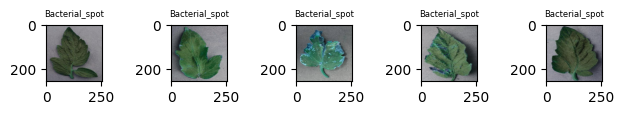

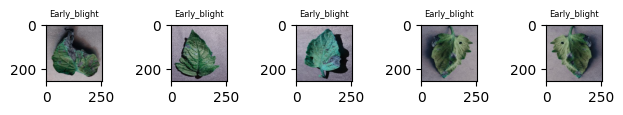

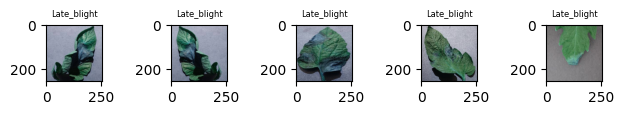

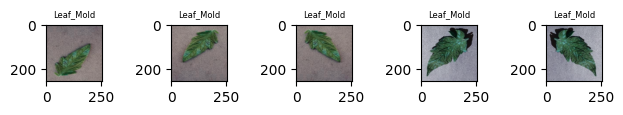

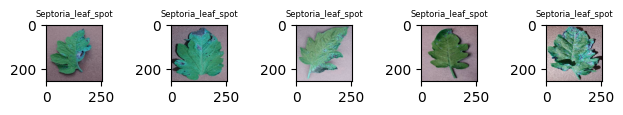

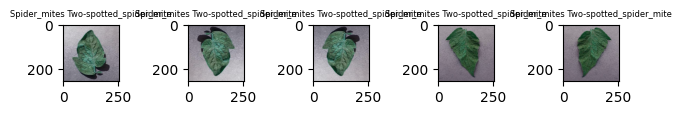

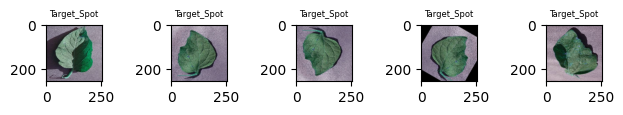

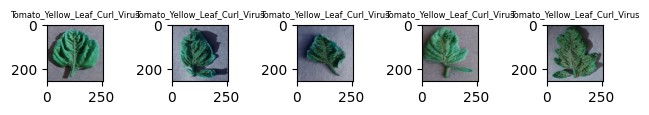

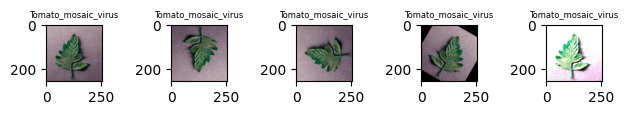

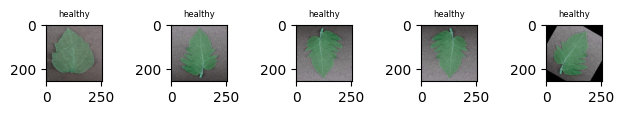

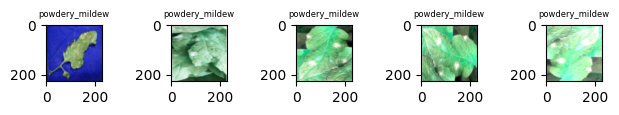

In [ ]:
for i in train_generator.class_indices:
  display_image(train_generator,i)

In [ ]:
#create test genrator from dataframms

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='path',
    y_col='classes',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False, #new addon
    # labels = 'inferred',
    # lable_mode = 'int',
    # colour_mode = 'rgb',
    # interpolation = 'bilinear'
)

Found 5171 validated image filenames belonging to 11 classes.


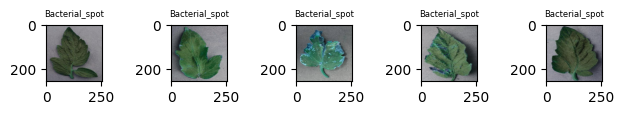

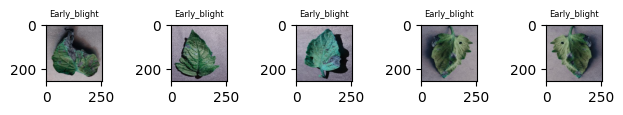

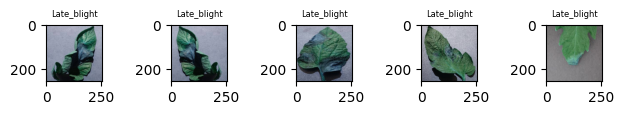

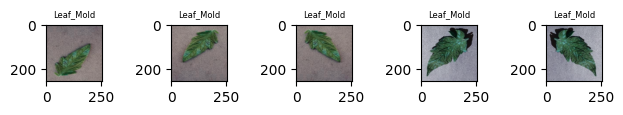

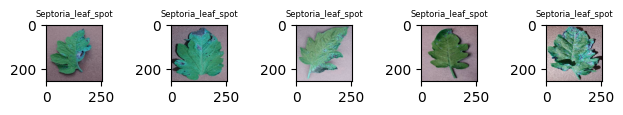

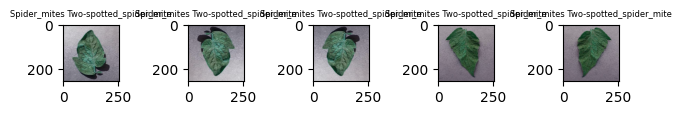

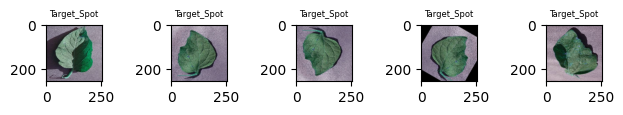

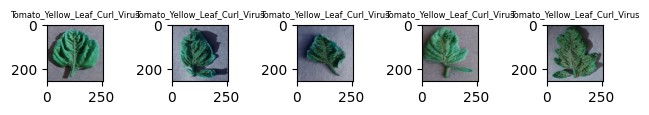

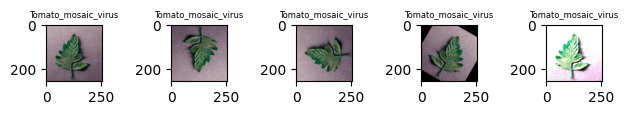

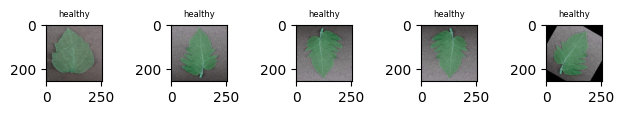

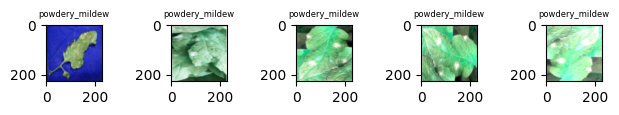

In [ ]:
for i in test_generator.class_indices:
  display_image(test_generator,i)

In [ ]:
#create valid genrator from data fraim
valid_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='path',
    y_col='classes',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False, #new addon
    # labels = 'inferred',
    # lable_mode = 'int',
    # colour_mode = 'rgb',
    # interpolation = 'bilinear'
)

Found 6683 validated image filenames belonging to 11 classes.


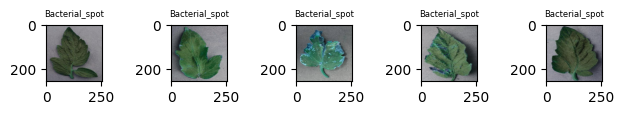

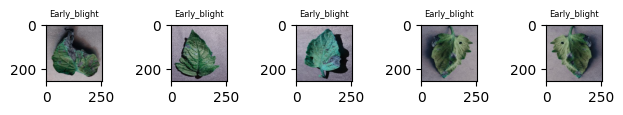

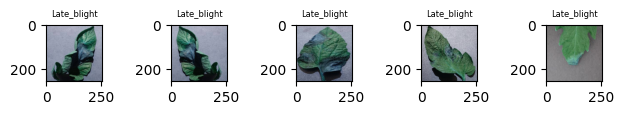

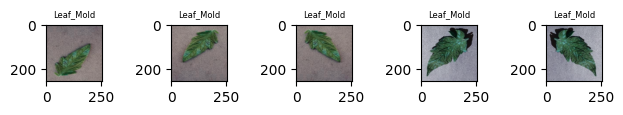

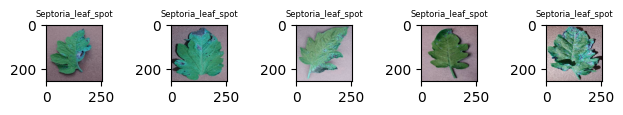

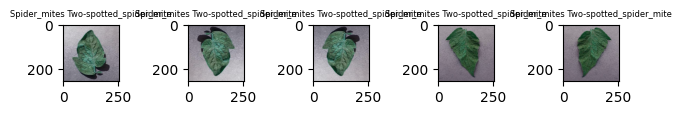

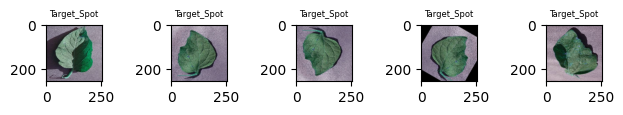

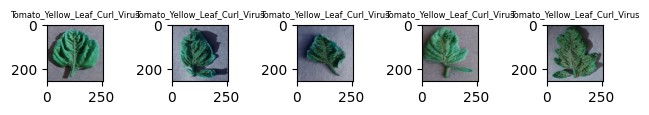

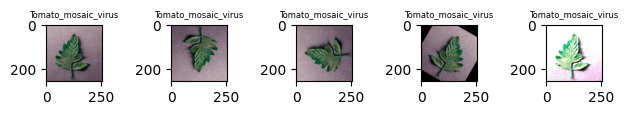

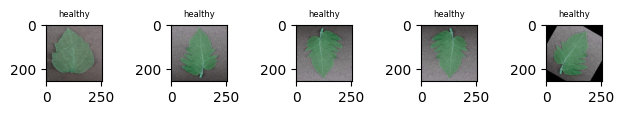

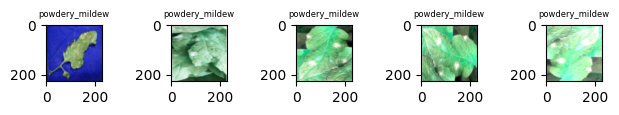

In [ ]:
for i in valid_generator.class_indices:
  display_image(valid_generator,i)

In [ ]:
# !pip install --upgrade tensorflow

# **Model traning**


## **Basice functions**

### 1. Utility Function

* to find the model save location

In [ ]:
def save_path(model_name):
  if in_colab:
    save_path=os.path.join("/content/drive/MyDrive/model",model_name)
  else:
    save_path= model_name
  return save_path

* to save model evaluation history


In [ ]:
def save_history(model_history,model_name): #model to save the model train history
  try:
    with open(f'{model_name}_history.json', 'w') as f:
      json.dump(model_history.history, f)
  except:
    print("Error : unable to save the history")


* to load model history

In [ ]:
def load_history(model_name): #function to load the save history
  try:
    with open(f'{model_name}_history.json', 'r') as f:
      r = json.load(f)
    return r
  except :
    print("Error : unable to load the history")

* to get model accuracy and loss in a particular datadset


In [ ]:

def evaluate_model(model,data,data_type:str):
  loss,acc=model.evaluate(data)
  print(f'{data_type} Accuracy: {acc*100:.2f}%')
  print(f'{data_type} Loss: {loss*100:.2f}%')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def plot_confusion_matrix(model, test_generator):
  # Get predictions for the test data
  y_pred = model.predict(test_generator)
  y_pred_classes = np.argmax(y_pred, axis=1)

  # Get true labels for the test data
  true_classes = test_generator.classes

  # Compute confusion matrix
  conf_matrix = confusion_matrix(true_classes, y_pred_classes)

  # Plot confusion matrix
  plt.figure(figsize=(8, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  # Compute overall accuracy
  accuracy = accuracy_score(true_classes, y_pred_classes)
  print(f"Overall Accuracy: {accuracy}")

  # Compute class-wise metrics
  precision = precision_score(true_classes, y_pred_classes, average=None)
  recall = recall_score(true_classes, y_pred_classes, average=None)
  f1 = f1_score(true_classes, y_pred_classes, average=None)

  # Get class labels from the generator
  class_labels = list(test_generator.class_indices.keys())

  # Create a DataFrame to display the results in a table format
  metrics_df_EffNet = pd.DataFrame({
      'Class': class_labels,
      'Precision': precision,
      'Recall (Sensitivity)': recall,
      'F1 Score': f1
  })
  return metrics_df_EffNet

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(r):
  train_accuracy = r['accuracy']
  val_accuracy = r['val_accuracy']
  train_loss = r['loss']
  val_loss = r['val_loss']
  plt.figure(figsize=(14, 5))
  plt.subplot(1, 2, 1)
  plt.plot(train_accuracy, label='Training Accuracy', color='blue')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend()


  # Plot validation accuracy
  plt.subplot(1, 2, 2)
  plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Validation Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()


  # Plot training and validation loss
  plt.figure(figsize=(14, 5))

  # Plot training loss
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='Training Loss', color='blue')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.legend()

  # Plot validation loss
  plt.subplot(1, 2, 2)
  plt.plot(val_loss, label='Validation Loss', color='orange')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Validation Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()



### 2. Traning Function

In [ ]:
#utility used in model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout,Flatten,Conv2D,MaxPool2D,Input,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

#all the model used
from tensorflow.keras.applications import EfficientNetB0,MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.xception import Xception


In [ ]:
import scipy
import json

* used to train model 2-5

In [ ]:
def model_train_new(base_model,model_name='model.h5'):
  # from tensorflow.keras import regularizers
  for layer in base_model.layers[:-10]:  # Freeze the first few layers
      layer.trainable = False

  model = Sequential([
      base_model,
      GlobalAveragePooling2D(),
      Dropout(0.15),
      Dense(1024,activation='relu'),
      Dense(11,activation='softmax')
  ])
  optimizer = Adamax(learning_rate=0.0001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  # plot_model(model,show_shapes=True,show_layer_names=True)

  steps_per_epoch = train_generator.samples // train_generator.batch_size
  validation_steps = valid_generator.samples // valid_generator.batch_size
  print("steps_per_epoch: ",steps_per_epoch)
  print("validation_steps: ",validation_steps)

  checkpoint = ModelCheckpoint(model_name, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
  callbacks_list = [checkpoint]
  r = model.fit(
      x=train_generator,
      epochs=Epochs,
      steps_per_epoch=steps_per_epoch,
      validation_data=valid_generator,
      validation_steps=validation_steps,
      callbacks=callbacks_list
  )
  model.save("manual " + model_name)
  save_history(r,model_name)

In [ ]:

def model_train(base_model,model_name ='model.h5'):
  for layer in base_model.layers[:-10]:  # Freeze the first few layers
      layer.trainable = False

  x = base_model.output
  x = Flatten()(x)
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)#, beta_regularizer=regularizers.l2(0.01), gamma_regularizer=regularizers.l2(0.01))(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.45)(x)

  predictions = Dense(11, activation='softmax')(x)#,kernel_regularizer=regularizers.l2(0.01))(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  optimizer = Adamax(learning_rate=0.0005)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  r=model.fit(
      x=train_generator,
      epochs=Epochs,
      validation_data=valid_generator,
      callbacks=early_stopping)
  model.save(model_name)
  save_history(r,model_name)
  return  r

In [ ]:
def model_train_old(base_model,model_name ='model.h5'):
  for layer in base_model.layers[:-10]:  # Freeze the first few layers
      layer.trainable = False

  x = base_model.output
  x = Flatten()(x)
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.45)(x)
  predictions = Dense(11, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  optimizer = Adamax(learning_rate=0.0005)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  r=model.fit(
      train_generator,
      epochs=Epochs,
      validation_data=valid_generator,
      callbacks=early_stopping)
  model.save(model_name)
  return  r

## **Models**

### 1. ResNet50 (Not use in project)

In [ ]:
model_name=save_path("Tomato_ResNet50.h5")

####traning

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))#,pooling='max')
r0 = model_train_new(base_model,model_name)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_9 (Dense)             (None, 11)                11275     
                                                                 
Total params: 25,697,163
Trainable params: 6,575,115
Non-trainable params: 19,122,048
__________________________________

####model evaluation


In [ ]:
model = tf.keras.models.load_model(model_name)

In [ ]:
#load history
r0=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 187s 574ms/step - loss: 1.5566 - accuracy: 0.4330
Train Accuracy: 43.30%
Train Loss: 155.66%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 15s 188ms/step - loss: 1.9074 - accuracy: 0.4204
Test Accuracy: 42.04%
Test Loss: 190.74%


81/81 [==============================] - 16s 184ms/step


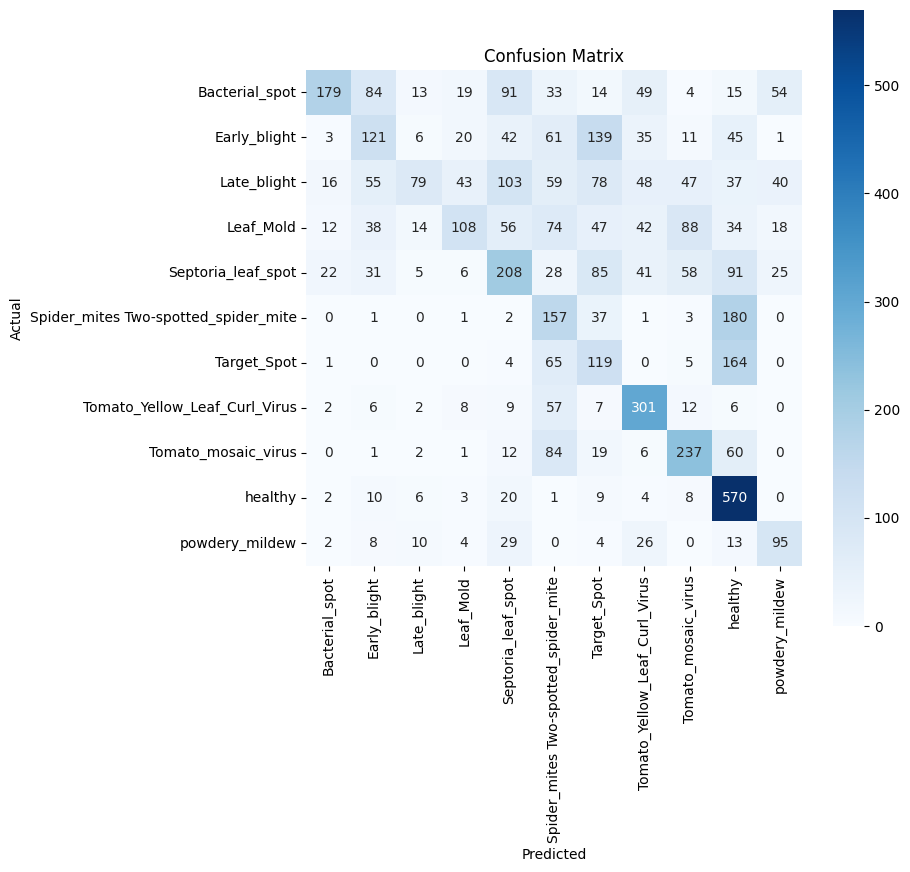

Overall Accuracy: 0.42042158189905243


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.748954              0.322523   
1                           Early_blight   0.340845              0.250000   
2                            Late_blight   0.576642              0.130579   
3                              Leaf_Mold   0.507042              0.203390   
4                     Septoria_leaf_spot   0.361111              0.346667   
5   Spider_mites Two-spotted_spider_mite   0.253635              0.410995   
6                            Target_Spot   0.213262              0.332402   
7          Tomato_Yellow_Leaf_Curl_Virus   0.544304              0.734146   
8                    Tomato_mosaic_virus   0.501057              0.561611   
9                                healthy   0.469136              0.900474   
10                        powdery_mildew   0.407725              0.497382   

    F1 Score  
0   0.450882  
1   0.288439  
2   0.212938  
3   0.290323  
4   0.353741  
5   0.313686  
6   0.259825  
7   0.625130  
8   0.529609  
9   0.616883  
10  0.448113

In [ ]:
plot_confusion_matrix(model, test_generator)

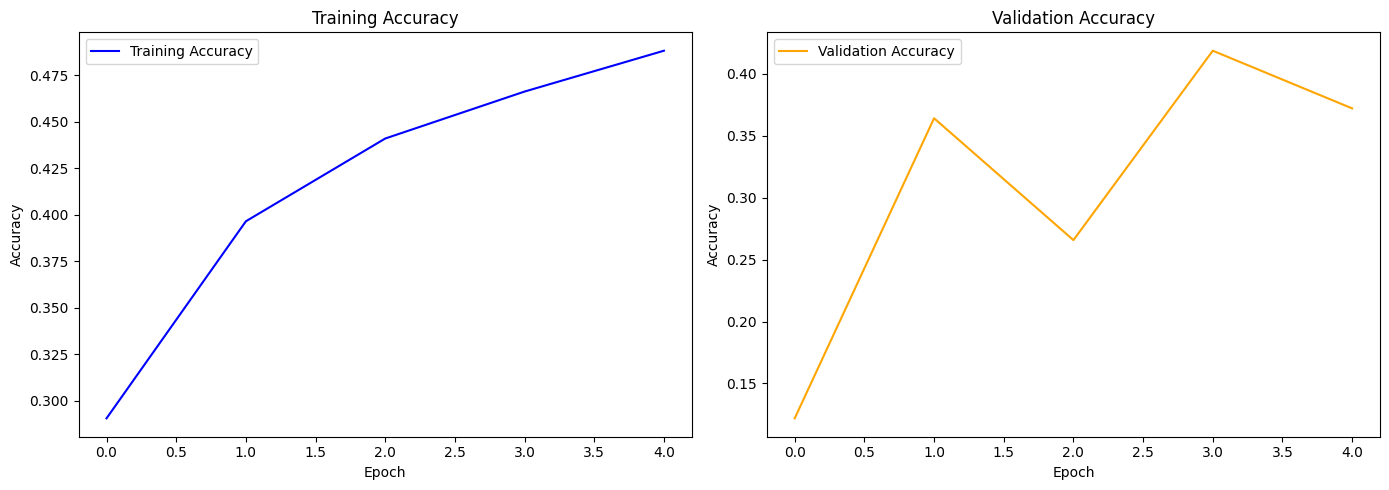

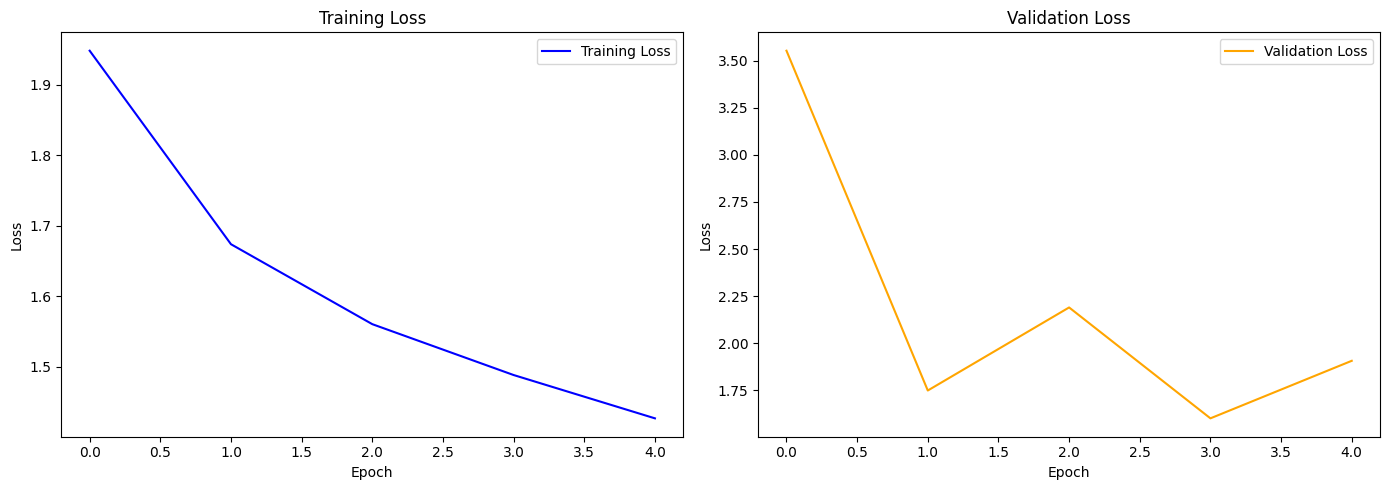

In [ ]:
plot_graphs(r0)

### 2. EfficientNetB0 (Not use in project)

In [ ]:
model_name=save_path('Tomato_EfficientNetB0_m2.h5')

#### Traning



In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))#, pooling='max')
# r = model_train(base_model,model_name)
r = model_train_new(base_model,model_name)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_11 (Dense)            (None, 11)                11275     
                                                                 
Total params: 5,372,590
Trainable params: 2,216,251
Non-trainable params: 3,156,339
____________________________________

####model evaluation


In [ ]:
model = tf.keras.models.load_model(model_name)

In [ ]:
#load history
r=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 194s 596ms/step - loss: 2.3513 - accuracy: 0.1800
Train Accuracy: 18.00%
Train Loss: 235.13%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 9s 115ms/step - loss: 2.3483 - accuracy: 0.1808
Test Accuracy: 18.08%
Test Loss: 234.83%


81/81 [==============================] - 11s 117ms/step


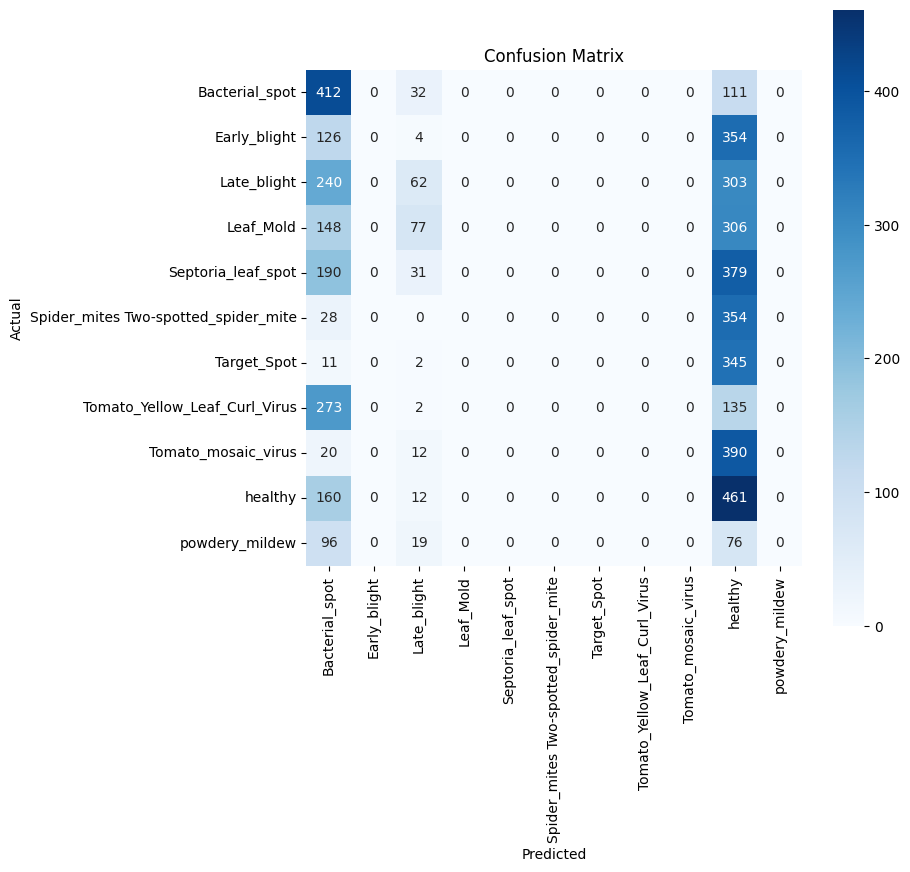

Overall Accuracy: 0.1808160897311932


C:\Users\Kamal\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.241784              0.742342   
1                           Early_blight   0.000000              0.000000   
2                            Late_blight   0.245059              0.102479   
3                              Leaf_Mold   0.000000              0.000000   
4                     Septoria_leaf_spot   0.000000              0.000000   
5   Spider_mites Two-spotted_spider_mite   0.000000              0.000000   
6                            Target_Spot   0.000000              0.000000   
7          Tomato_Yellow_Leaf_Curl_Virus   0.000000              0.000000   
8                    Tomato_mosaic_virus   0.000000              0.000000   
9                                healthy   0.143435              0.728278   
10                        powdery_mildew   0.000000              0.000000   

    F1 Score  
0   0.364763  
1   0.000000  
2   0.144522  
3   0.000000  
4   0.000000  
5   0.000000  
6   0.000000  
7   0.000000  
8   0.000000  
9   0.239667  
10  0.000000

In [ ]:
plot_confusion_matrix(model, test_generator)

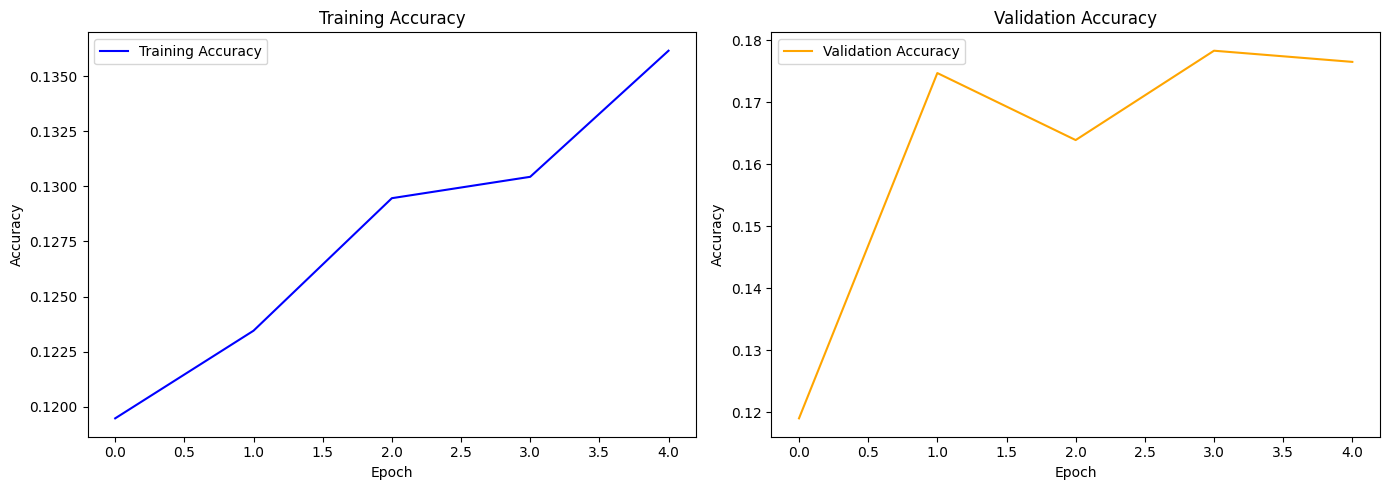

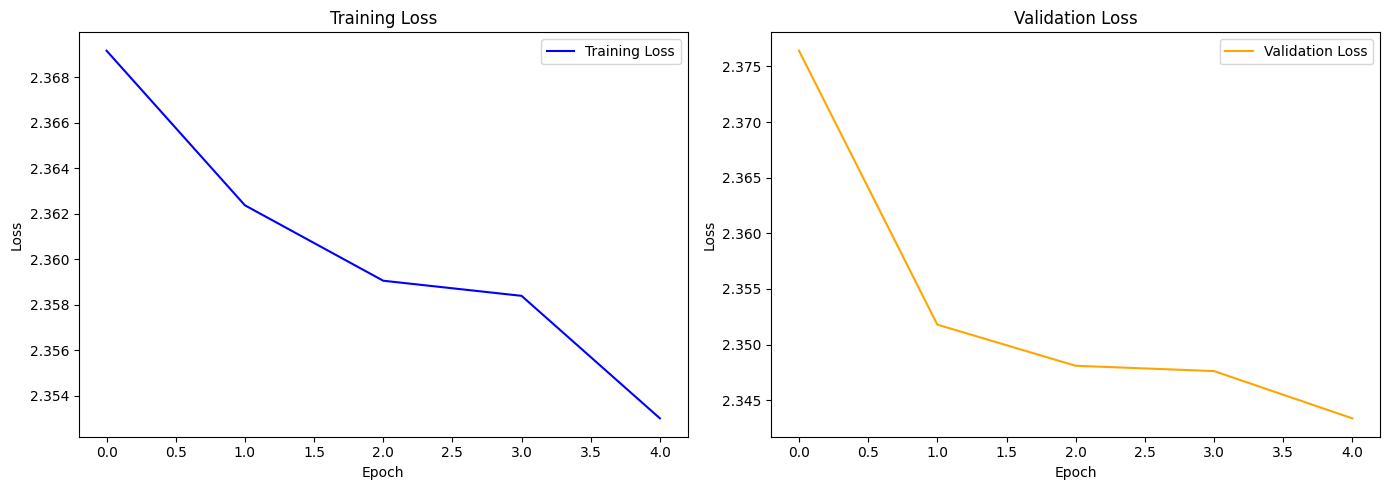

In [ ]:
plot_graphs(r)

### 3. VGG 16

In [ ]:
model_name=save_path('Tomato_VGG16.h5')

#### Traning

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))#, pooling='max')
r2 = model_train_new(base_model,model_name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 11)                11275     
                                                                 
Total params: 15,251,275
Trainable params: 14,105,867
Non-trainable params: 1,145,408
____________________________________

####model evaluation


In [ ]:
print(" Model: ",model_name,"Sucesfully imported")
model = tf.keras.models.load_model(model_name)

 Model:  Tomato_VGG16.h5 Sucesfully imported


In [ ]:
#load history
r2=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 190s 586ms/step - loss: 0.0446 - accuracy: 0.9852
Train Accuracy: 98.52%
Train Loss: 4.46%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 26s 315ms/step - loss: 0.1233 - accuracy: 0.9665
Test Accuracy: 96.65%
Test Loss: 12.33%


81/81 [==============================] - 19s 240ms/step


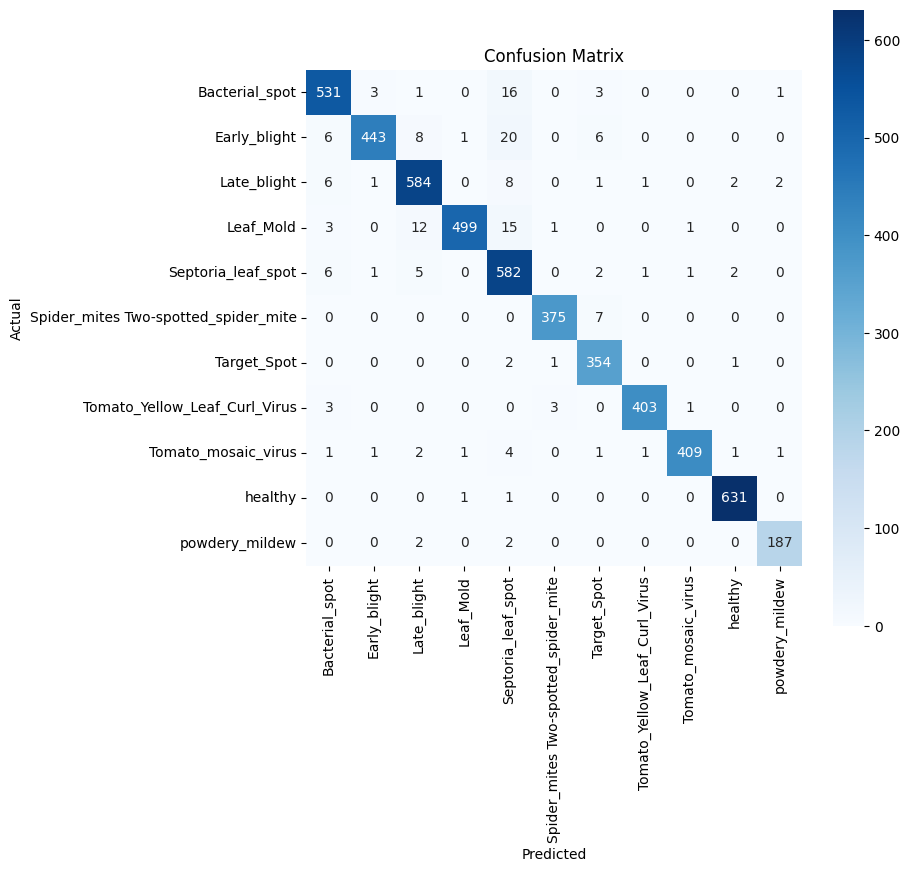

Overall Accuracy: 0.9665441887449236


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.955036              0.956757   
1                           Early_blight   0.986637              0.915289   
2                            Late_blight   0.951140              0.965289   
3                              Leaf_Mold   0.994024              0.939736   
4                     Septoria_leaf_spot   0.895385              0.970000   
5   Spider_mites Two-spotted_spider_mite   0.986842              0.981675   
6                            Target_Spot   0.946524              0.988827   
7          Tomato_Yellow_Leaf_Curl_Virus   0.992611              0.982927   
8                    Tomato_mosaic_virus   0.992718              0.969194   
9                                healthy   0.990581              0.996840   
10                        powdery_mildew   0.979058              0.979058   

    F1 Score  
0   0.955896  
1   0.949625  
2   0.958162  
3   0.966118  
4   0.931200  
5   0.984252  
6   0.967213  
7   0.987745  
8   0.980815  
9   0.993701  
10  0.979058

In [ ]:
plot_confusion_matrix(model, test_generator)

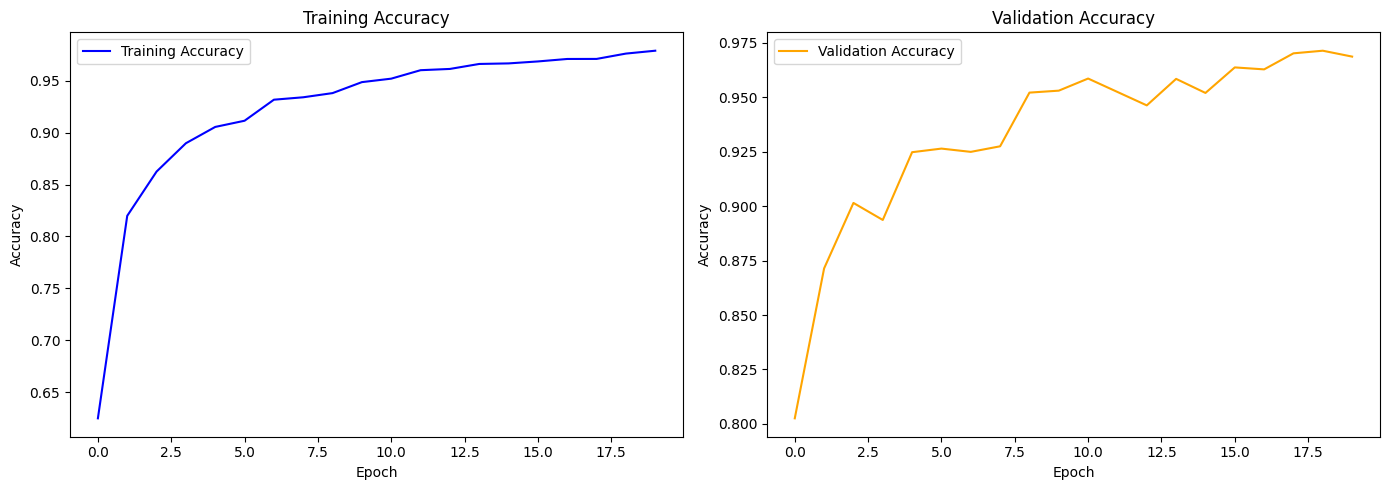

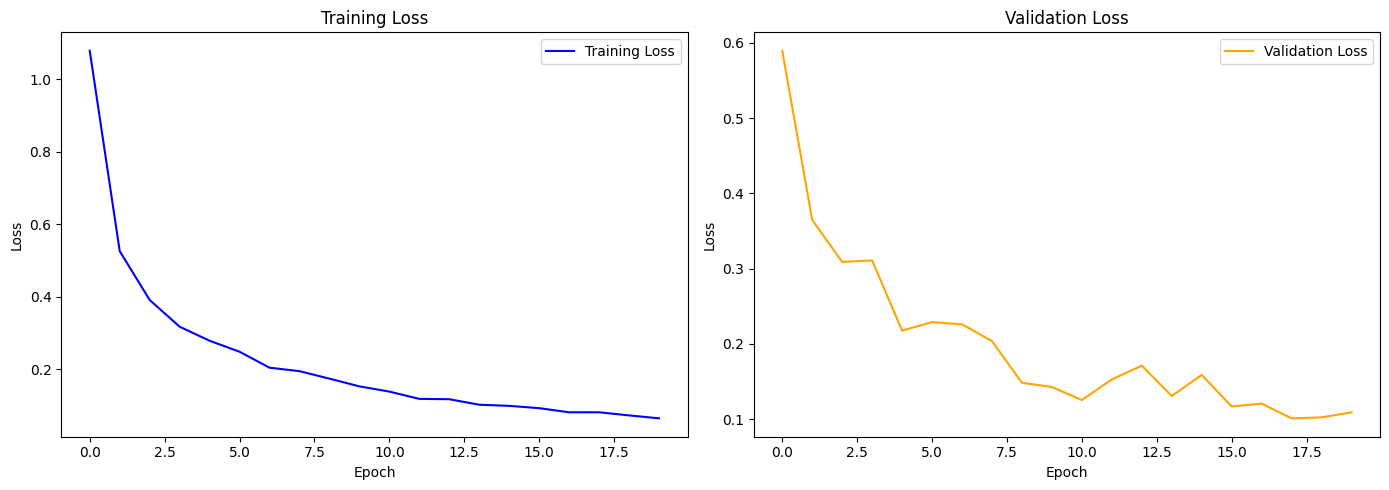

In [ ]:
plot_graphs(r2)

### 4. InceptionV3

In [ ]:
model_name=save_path('Tomato_InceptionV3.h5')

#### Traning

In [ ]:
base_model = InceptionV3(input_shape=[IMG_SIZE,IMG_SIZE] + [3], weights='imagenet', include_top=False)#, pooling='max')
r3 = model_train_new(base_model,model_name)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 11)                11275     
                                                                 
Total params: 23,912,235
Trainable params: 2,109,643
Non-trainable params: 21,802,592
__________________________________

####model evaluation


In [ ]:
model = tf.keras.models.load_model(model_name)

In [ ]:
#load history
r3=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 193s 593ms/step - loss: 0.6597 - accuracy: 0.7809
Train Accuracy: 78.09%
Train Loss: 65.97%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 11s 139ms/step - loss: 0.7366 - accuracy: 0.7559
Test Accuracy: 75.59%
Test Loss: 73.66%


81/81 [==============================] - 11s 120ms/step


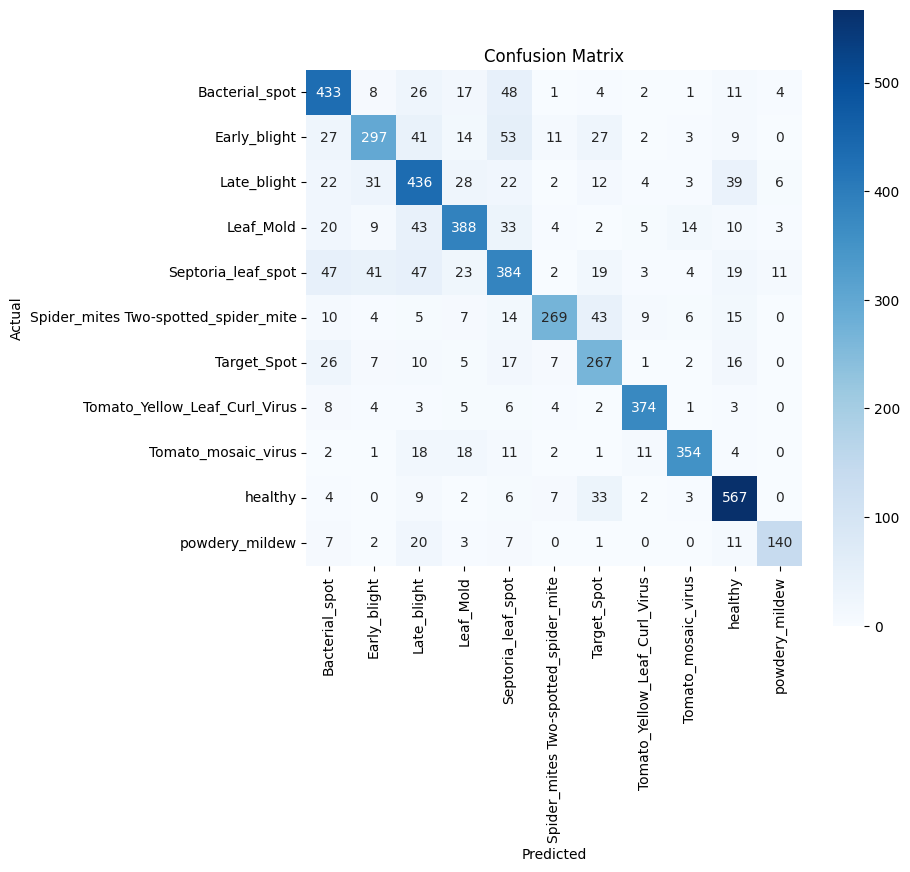

Overall Accuracy: 0.7559466254109457


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.714521              0.780180   
1                           Early_blight   0.735149              0.613636   
2                            Late_blight   0.662614              0.720661   
3                              Leaf_Mold   0.760784              0.730697   
4                     Septoria_leaf_spot   0.638935              0.640000   
5   Spider_mites Two-spotted_spider_mite   0.870550              0.704188   
6                            Target_Spot   0.649635              0.745810   
7          Tomato_Yellow_Leaf_Curl_Virus   0.905569              0.912195   
8                    Tomato_mosaic_virus   0.905371              0.838863   
9                                healthy   0.805398              0.895735   
10                        powdery_mildew   0.853659              0.732984   

    F1 Score  
0   0.745909  
1   0.668919  
2   0.690420  
3   0.745437  
4   0.639467  
5   0.778582  
6   0.694408  
7   0.908870  
8   0.870849  
9   0.848168  
10  0.788732

In [ ]:
plot_confusion_matrix(model, test_generator)

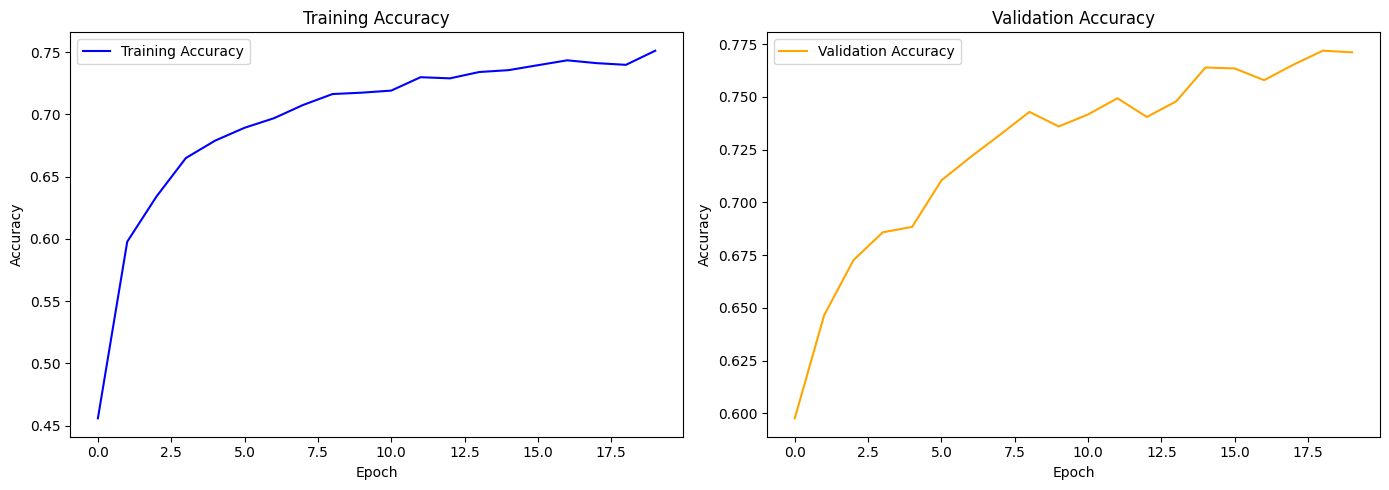

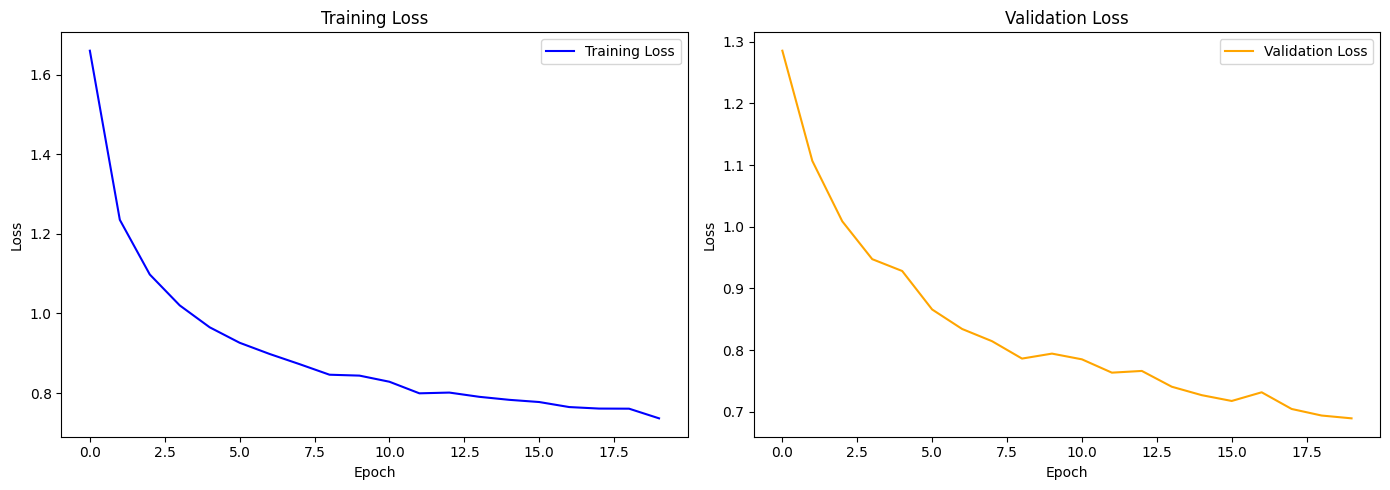

In [ ]:
plot_graphs(r3)

### 5. MobileNetV2

In [ ]:
model_name=save_path('Tomato_MobileNetV2.h5')

#### Traning

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

r4 = model_train_new(base_model,model_name)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_5 (Dense)             (None, 11)                11275     
                                                                 
Total params: 3,581,003
Trainable params: 2,055,499
No

####model evaluation


In [ ]:
model = tf.keras.models.load_model(model_name)

In [ ]:
#load history
r=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 192s 588ms/step - loss: 0.1957 - accuracy: 0.9299
Train Accuracy: 92.99%
Train Loss: 19.57%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 13s 159ms/step - loss: 0.4006 - accuracy: 0.8656
Test Accuracy: 86.56%
Test Loss: 40.06%


81/81 [==============================] - 9s 103ms/step


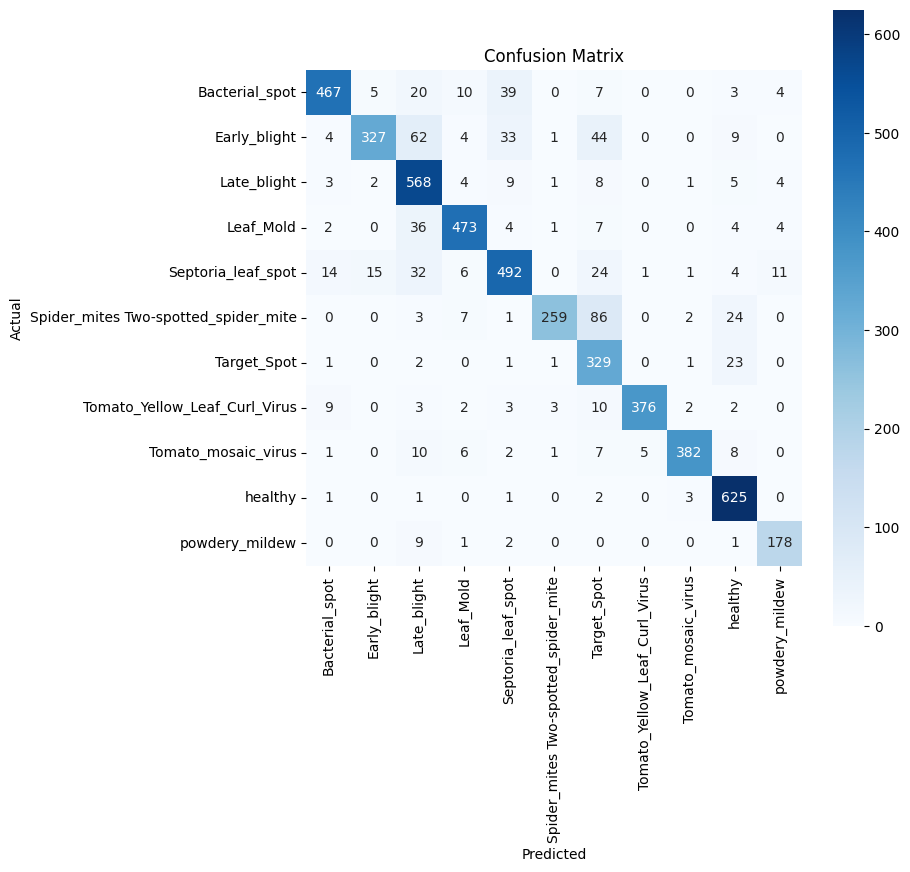

Overall Accuracy: 0.8655965964030168


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.930279              0.841441   
1                           Early_blight   0.936963              0.675620   
2                            Late_blight   0.761394              0.938843   
3                              Leaf_Mold   0.922027              0.890772   
4                     Septoria_leaf_spot   0.838160              0.820000   
5   Spider_mites Two-spotted_spider_mite   0.970037              0.678010   
6                            Target_Spot   0.627863              0.918994   
7          Tomato_Yellow_Leaf_Curl_Virus   0.984293              0.917073   
8                    Tomato_mosaic_virus   0.974490              0.905213   
9                                healthy   0.882768              0.987362   
10                        powdery_mildew   0.885572              0.931937   

    F1 Score  
0   0.883633  
1   0.785114  
2   0.840859  
3   0.906130  
4   0.828981  
5   0.798151  
6   0.746032  
7   0.949495  
8   0.938575  
9   0.932140  
10  0.908163

In [ ]:
plot_confusion_matrix(model, test_generator)

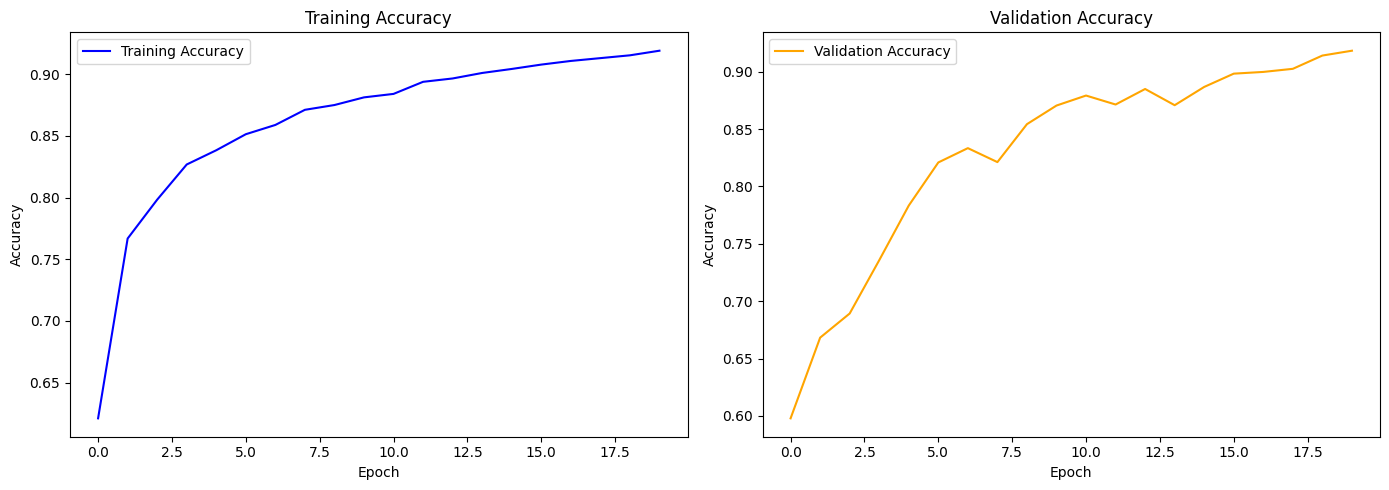

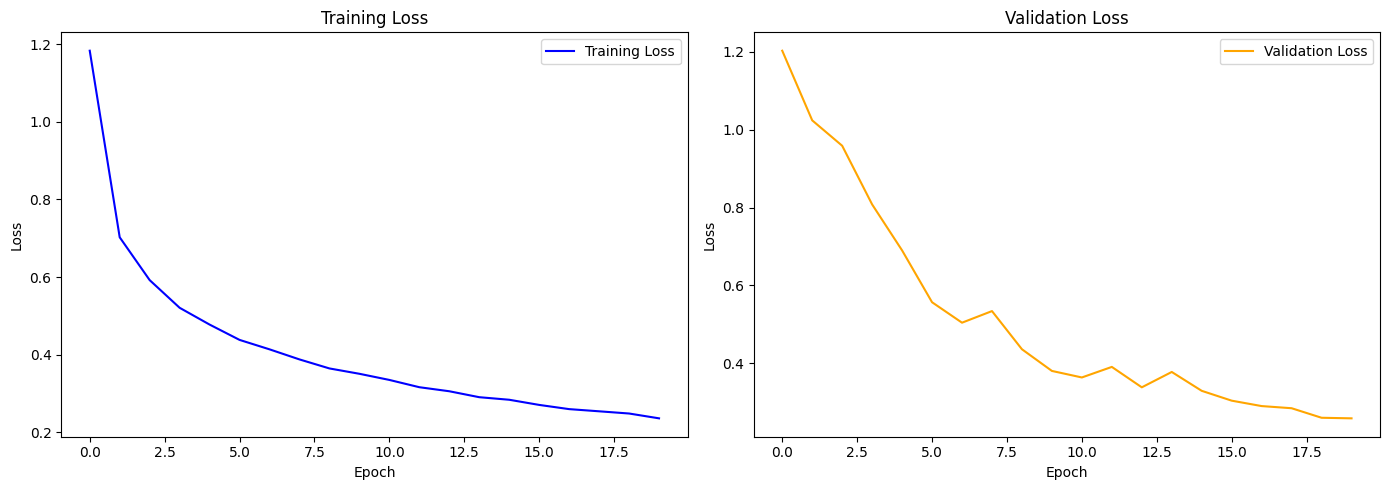

In [ ]:
plot_graphs(r)

### 6. Densenet-121

In [ ]:
model_name=save_path('Tomato_Densenet_121.h5')

#### Traning

In [ ]:
 base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
r5 = model_train_new(base_model,model_name)

29084464/29084464 [==============================] - 4s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 11)                11275     
                                                                 
Total params: 8,098,379
Trainable params: 1,229,003
Non

####model evaluation


In [ ]:
model = tf.keras.models.load_model(model_name)

In [ ]:
#load history
r=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 194s 592ms/step - loss: 0.2076 - accuracy: 0.9326
Train Accuracy: 93.26%
Train Loss: 20.76%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 14s 177ms/step - loss: 0.2345 - accuracy: 0.9211
Test Accuracy: 92.11%
Test Loss: 23.45%


81/81 [==============================] - 13s 147ms/step


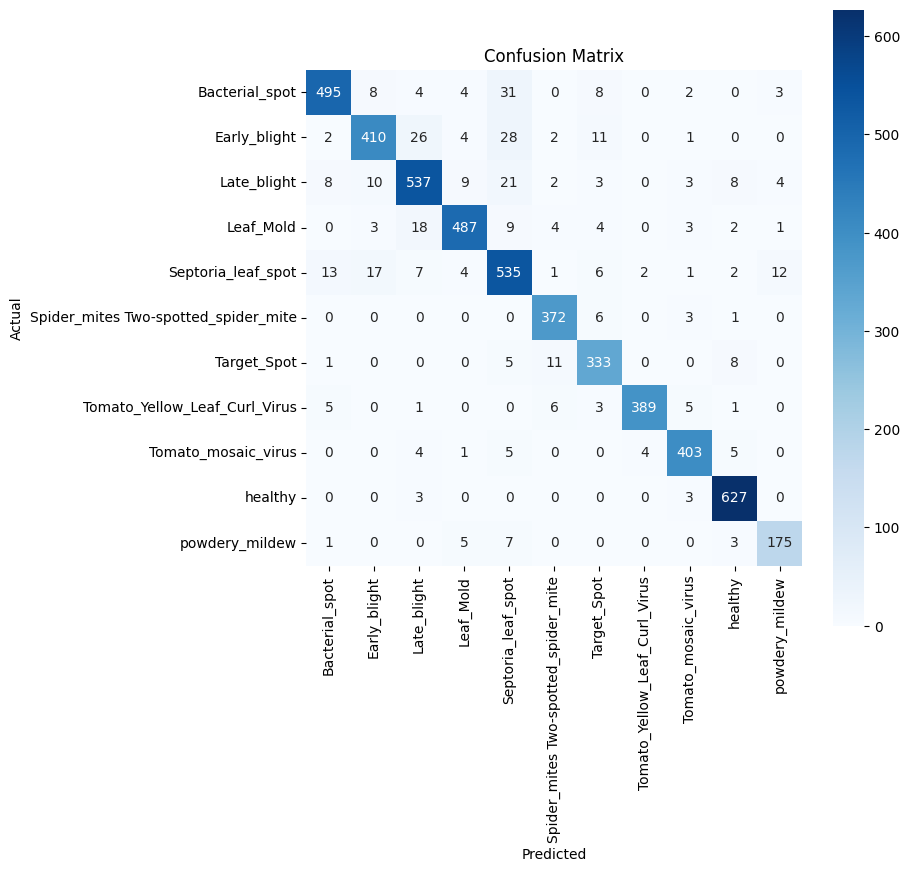

Overall Accuracy: 0.921098433571843


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.942857              0.891892   
1                           Early_blight   0.915179              0.847107   
2                            Late_blight   0.895000              0.887603   
3                              Leaf_Mold   0.947471              0.917137   
4                     Septoria_leaf_spot   0.834633              0.891667   
5   Spider_mites Two-spotted_spider_mite   0.934673              0.973822   
6                            Target_Spot   0.890374              0.930168   
7          Tomato_Yellow_Leaf_Curl_Virus   0.984810              0.948780   
8                    Tomato_mosaic_virus   0.950472              0.954976   
9                                healthy   0.954338              0.990521   
10                        powdery_mildew   0.897436              0.916230   

    F1 Score  
0   0.916667  
1   0.879828  
2   0.891286  
3   0.932057  
4   0.862208  
5   0.953846  
6   0.909836  
7   0.966460  
8   0.952719  
9   0.972093  
10  0.906736

In [ ]:
plot_confusion_matrix(model, test_generator)

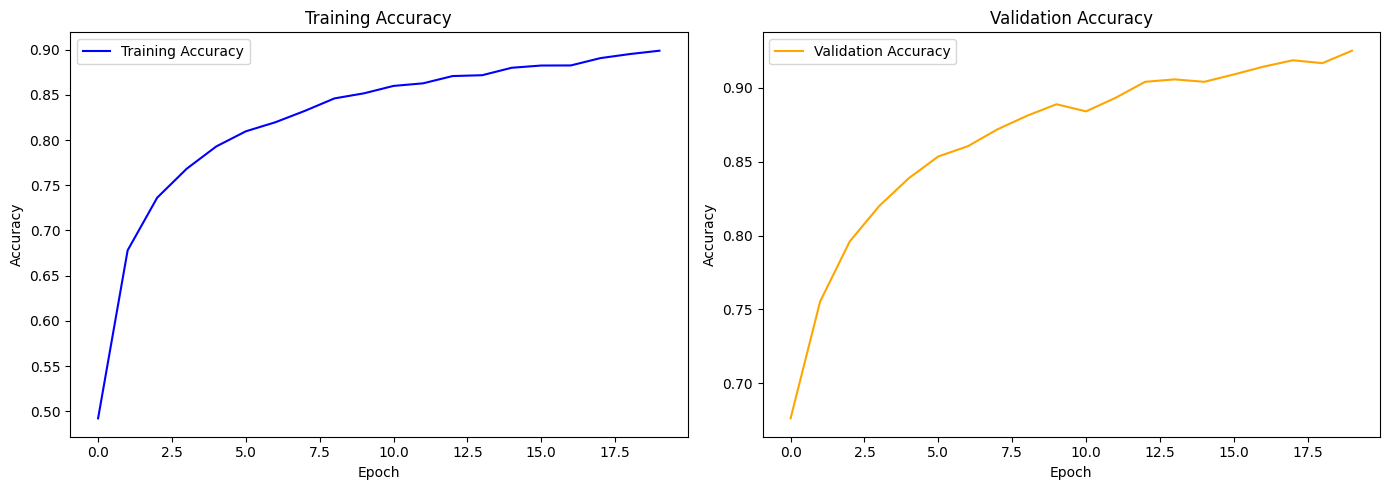

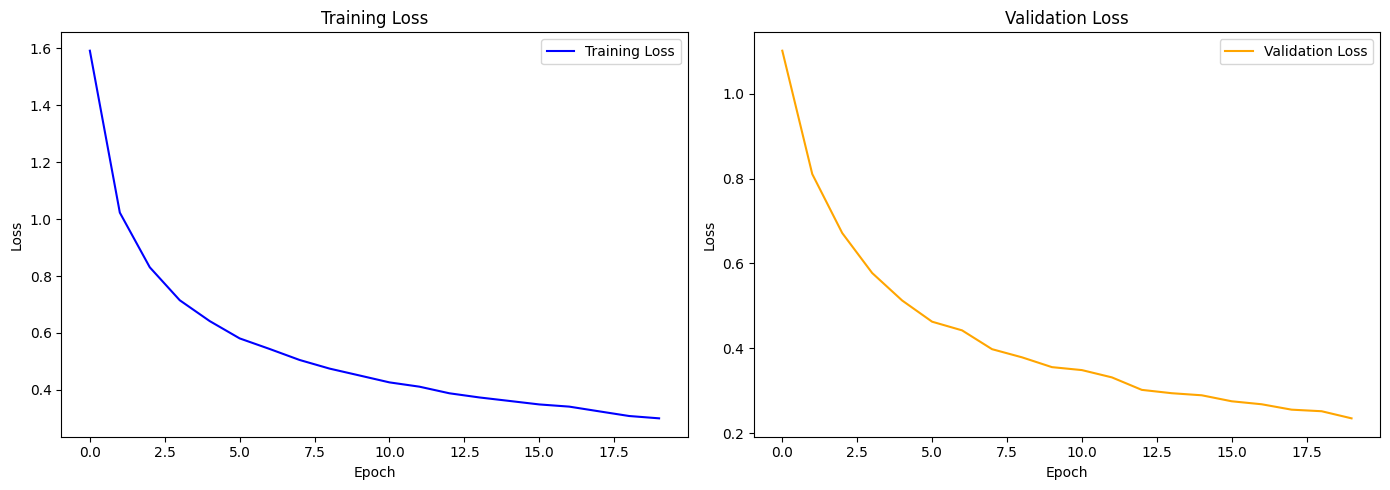

In [ ]:
plot_graphs(r)

### 7. Xception

In [ ]:
model_name=save_path('Tomato_Xception.h5')

#### Traning

In [ ]:
base_model= Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
r5 = model_train_new(base_model,model_name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 11)                11275     
                                                                 
Total params: 22,970,931
Trainable params: 7,605,771
Non-trainable params: 15,365,160
____________________________________

####model evaluation


In [ ]:
model = tf.keras.models.load_model(model_name)

In [ ]:
#load history
r=load_history(model_name)

In [ ]:
evaluate_model(model,train_generator,"Train")

324/324 [==============================] - 190s 583ms/step - loss: 0.0675 - accuracy: 0.9786
Train Accuracy: 97.86%
Train Loss: 6.75%


In [ ]:
evaluate_model(model,test_generator,"Test")

81/81 [==============================] - 19s 235ms/step - loss: 0.1496 - accuracy: 0.9582
Test Accuracy: 95.82%
Test Loss: 14.96%


81/81 [==============================] - 16s 194ms/step


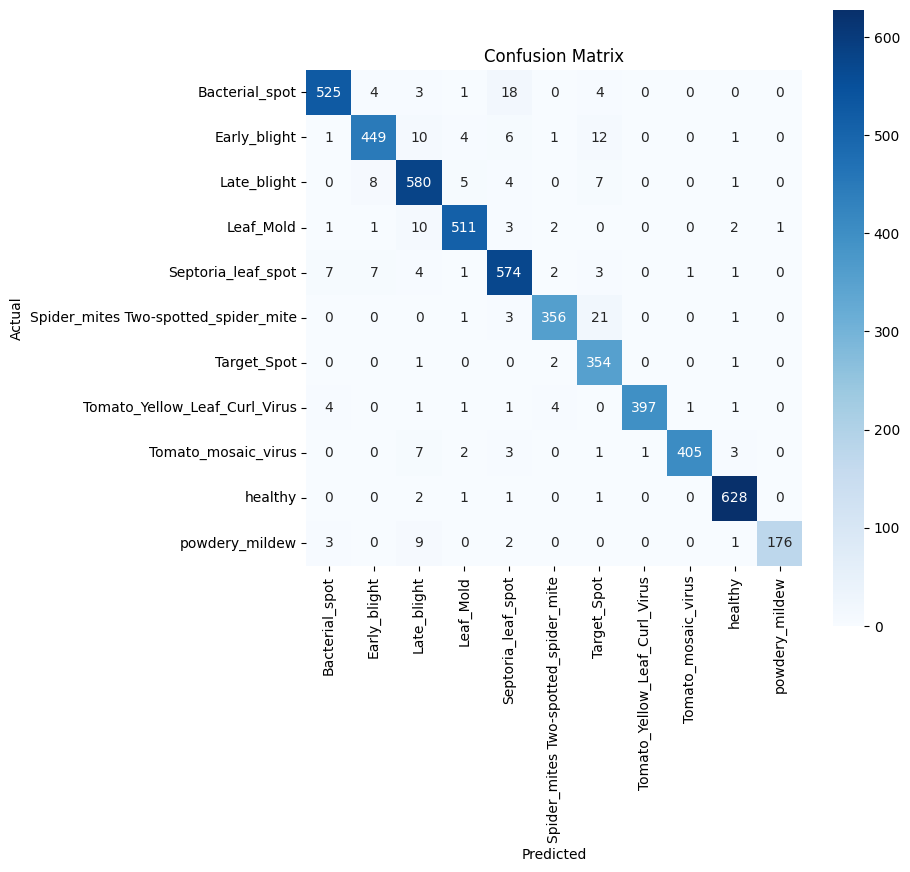

Overall Accuracy: 0.9582285824792109


Class  Precision  Recall (Sensitivity)  \
0                         Bacterial_spot   0.970425              0.945946   
1                           Early_blight   0.957356              0.927686   
2                            Late_blight   0.925040              0.958678   
3                              Leaf_Mold   0.969639              0.962335   
4                     Septoria_leaf_spot   0.933333              0.956667   
5   Spider_mites Two-spotted_spider_mite   0.970027              0.931937   
6                            Target_Spot   0.878412              0.988827   
7          Tomato_Yellow_Leaf_Curl_Virus   0.997487              0.968293   
8                    Tomato_mosaic_virus   0.995086              0.959716   
9                                healthy   0.981250              0.992101   
10                        powdery_mildew   0.994350              0.921466   

    F1 Score  
0   0.958029  
1   0.942288  
2   0.941558  
3   0.965974  
4   0.944856  
5   0.950601  
6   0.930355  
7   0.982673  
8   0.977081  
9   0.986646  
10  0.956522

In [ ]:
plot_confusion_matrix(model, test_generator)

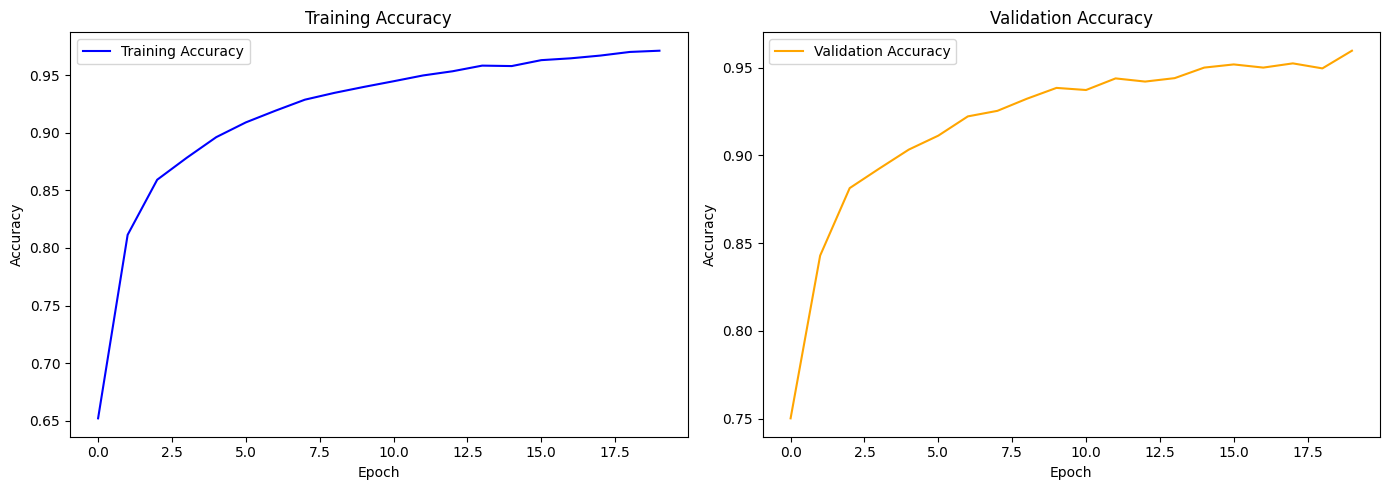

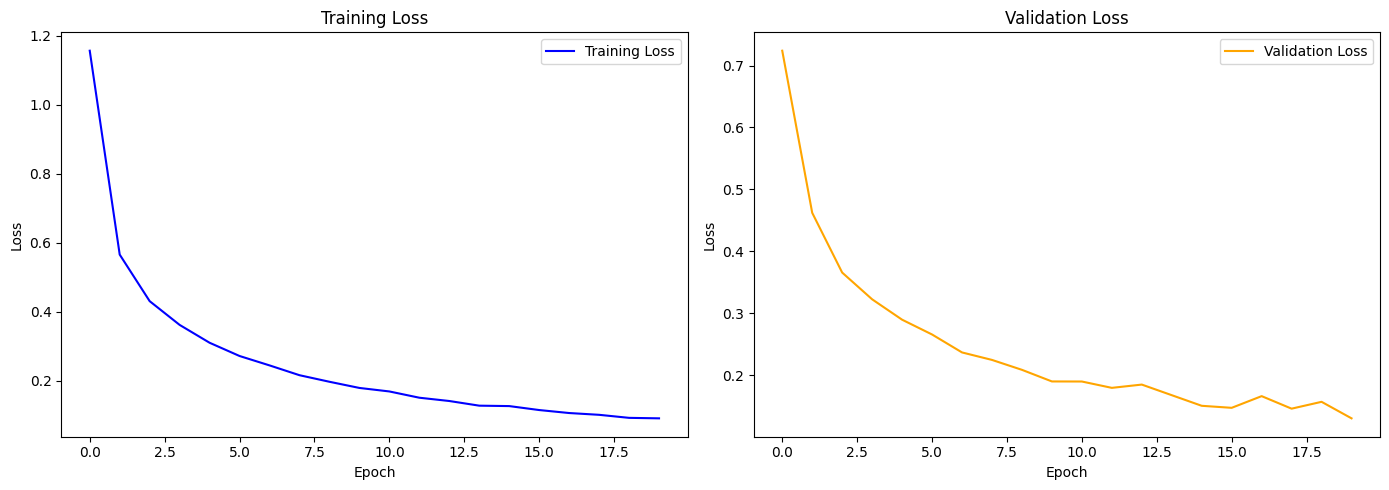

In [ ]:
plot_graphs(r)

# Models evaluation


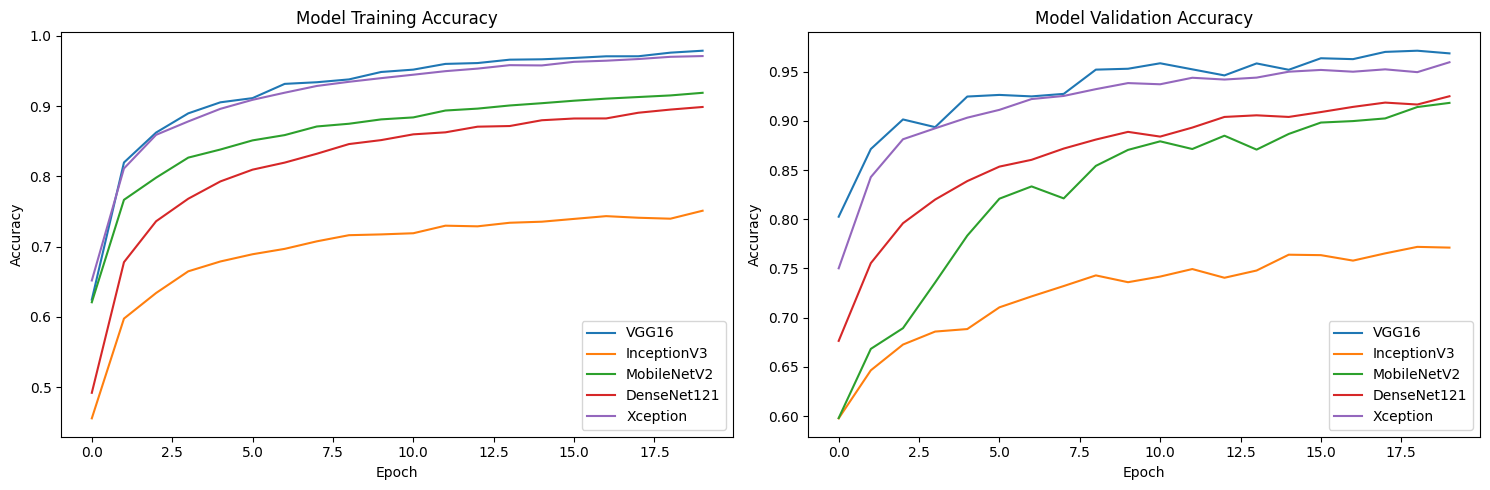

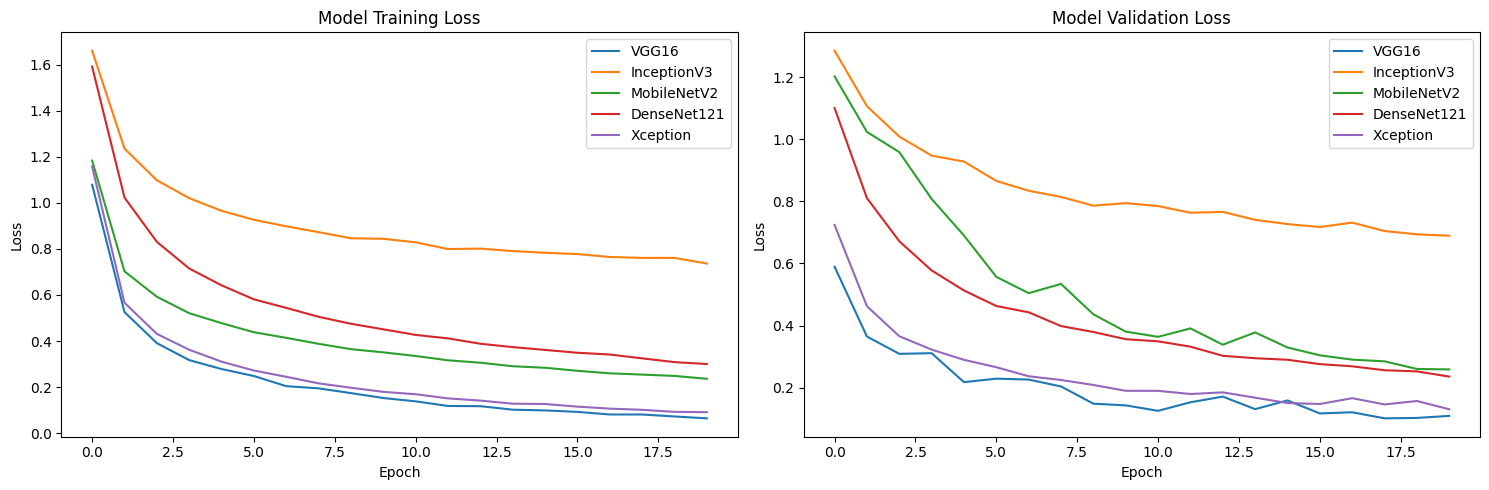

In [ ]:
#plot the graph for all the models accuracy (traing, validation),loss(traning,validation)
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import os

def load_history(model_path):
    """Loads training history from a JSON file."""
    history_path = model_path + '_history.json'
    try:
        with open(history_path, 'r') as f:
            history = json.load(f)
        return history
    except FileNotFoundError:
        print(f"Error: History file not found for {model_path}")
        return None

def plot_model_performance(history_dict, model_names):
    """Plots accuracy and loss curves for multiple models
       with separate graphs for training and validation."""

    # Create subplots for accuracy (training & validation)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Model Training Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[1].set_title('Model Validation Accuracy')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')

    # Plot accuracy curves for (traning and validation)
    for model_name in model_names:
        history = history_dict[model_name]
        axes[0].plot(history['accuracy'], label=model_name)
        axes[1].plot(history['val_accuracy'], label=model_name)

    axes[0].legend(loc='lower right')
    axes[1].legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    # Create subplots for loss (training & validation)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Model Training Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[1].set_title('Model Validation Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')

    # Plot loss curves for loss (training & validation)
    for model_name in model_names:
        history = history_dict[model_name]
        axes[0].plot(history['loss'], label=model_name)
        axes[1].plot(history['val_loss'], label=model_name)

    axes[0].legend(loc='upper right')
    axes[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()


# Load models and histories
model_paths = {  # Define the model_paths dictionary
    'VGG16': "Tomato_VGG16.h5",
    'InceptionV3': "Tomato_InceptionV3.h5",
    'MobileNetV2': "Tomato_MobileNetV2.h5",
    'DenseNet121': "Tomato_Densenet_121.h5",
    'Xception': "Tomato_Xception.h5",
}

history_dict = {}
# Load history
for model_name, model_path in model_paths.items():
    history = load_history(model_path)
    if history:
        history_dict[model_name] = history

# Get the model names with loaded histories
model_names = list(history_dict.keys())

# Plot the performance if histories were loaded
if model_names:
    plot_model_performance(history_dict, model_names)
else:
    print("Error: No model histories loaded. Check model paths and history files.")